In [50]:
import os
import warnings
warnings.filterwarnings('ignore')

paths =[]
labels = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

In [51]:
paths[:8]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav']

In [52]:
labels[:8]

['fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear']

In [53]:
import pandas as pd

df= pd.DataFrame()
df['speech']= paths
df['label']= labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [54]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

In [55]:
df['label_count']= df['label'].value_counts()

In [56]:
df.drop('label_count', axis = 1)

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear
...,...,...
5595,/kaggle/input/toronto-emotional-speech-set-tes...,ps
5596,/kaggle/input/toronto-emotional-speech-set-tes...,ps
5597,/kaggle/input/toronto-emotional-speech-set-tes...,ps
5598,/kaggle/input/toronto-emotional-speech-set-tes...,ps


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       5600 non-null   object 
 1   label        5600 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 131.4+ KB


<Axes: ylabel='count'>

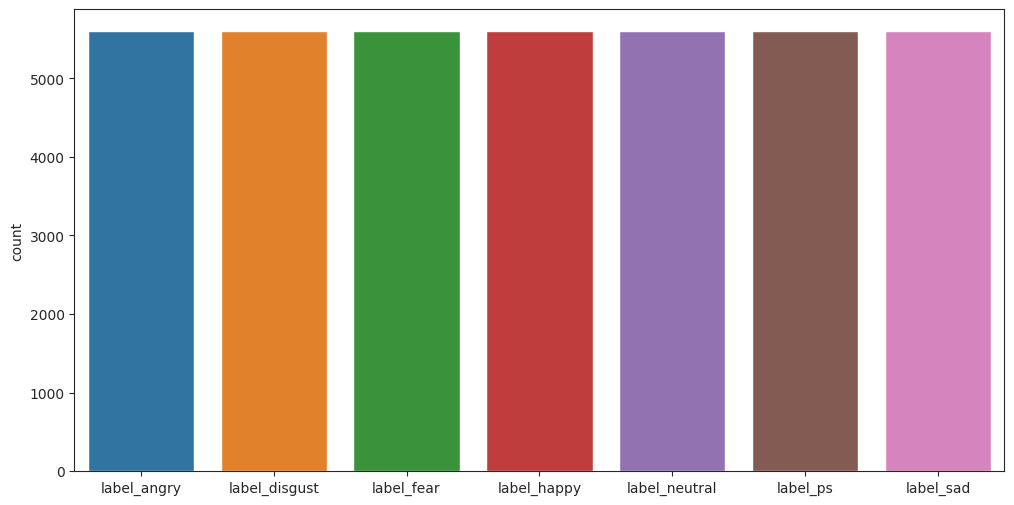

In [58]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
encoder = OneHotEncoder(sparse=False)
label_encoded = encoder.fit_transform(df[['label']])
label_encoded_df = pd.DataFrame(label_encoded, columns=encoder.get_feature_names_out(['label']))
sns.set_style("ticks")
sns.countplot(label_encoded_df)

In [59]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size =20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [60]:
def spectogram(data, sr, emotion):
    plt.figure(figsize=(11,4))
    x= librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb,sr = sr, x_axis='time', y_axis= 'hz')
    plt.colorbar()
    plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       5600 non-null   object 
 1   label        5600 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 131.4+ KB


In [62]:
df.drop('label_count', axis=1, inplace = True)

In [63]:
print(df.head())
print(df['label'].unique())

                                              speech label
0  /kaggle/input/toronto-emotional-speech-set-tes...  fear
1  /kaggle/input/toronto-emotional-speech-set-tes...  fear
2  /kaggle/input/toronto-emotional-speech-set-tes...  fear
3  /kaggle/input/toronto-emotional-speech-set-tes...  fear
4  /kaggle/input/toronto-emotional-speech-set-tes...  fear
['fear' 'angry' 'disgust' 'neutral' 'sad' 'ps' 'happy']


In [64]:
df['speech'].unique()

array(['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
       '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
       '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
       ...,
       '/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_time_ps.wav',
       '/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_road_ps.wav',
       '/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_boat_ps.wav'],
      dtype=object)

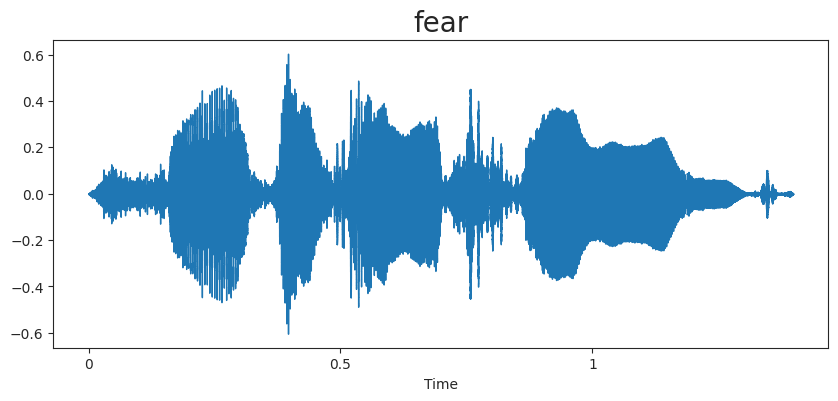

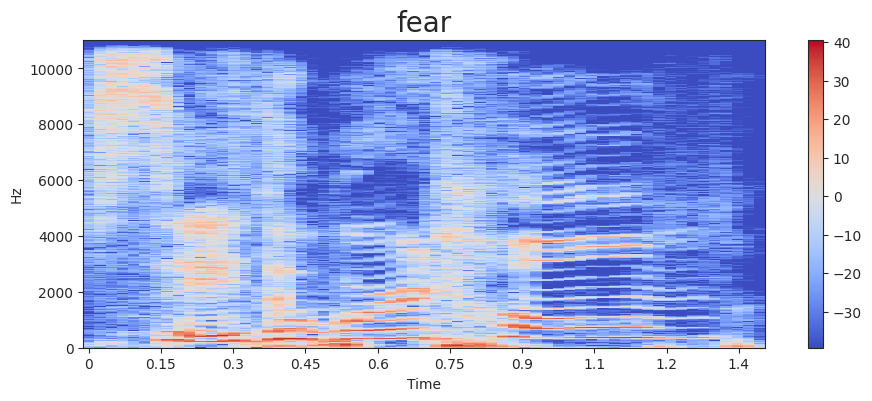

In [65]:
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np

emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

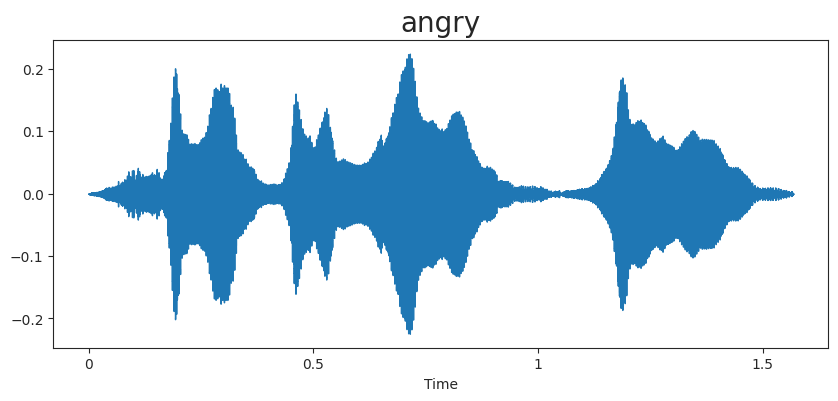

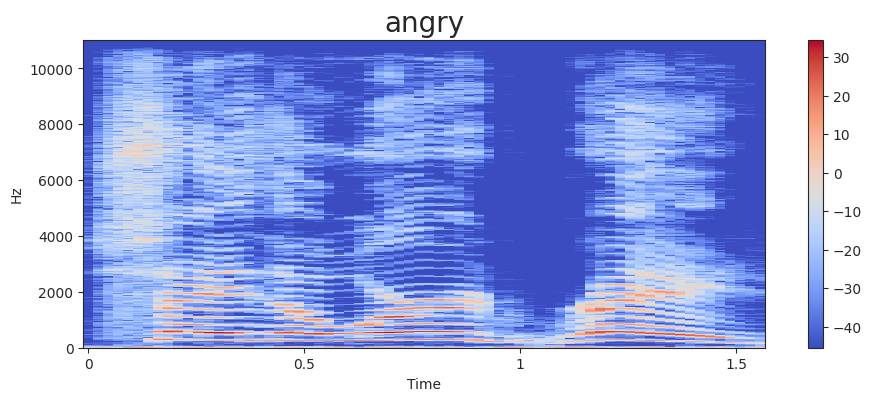

In [66]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

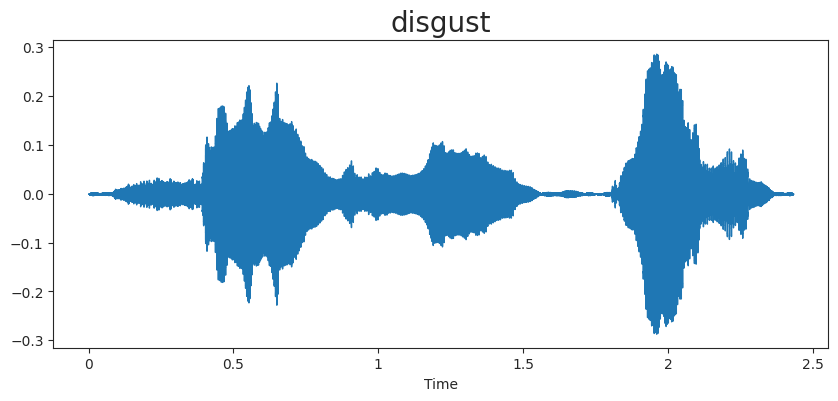

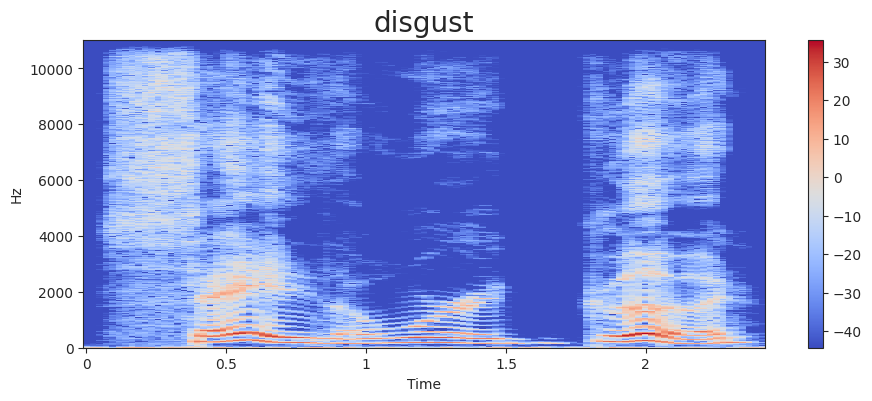

In [67]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

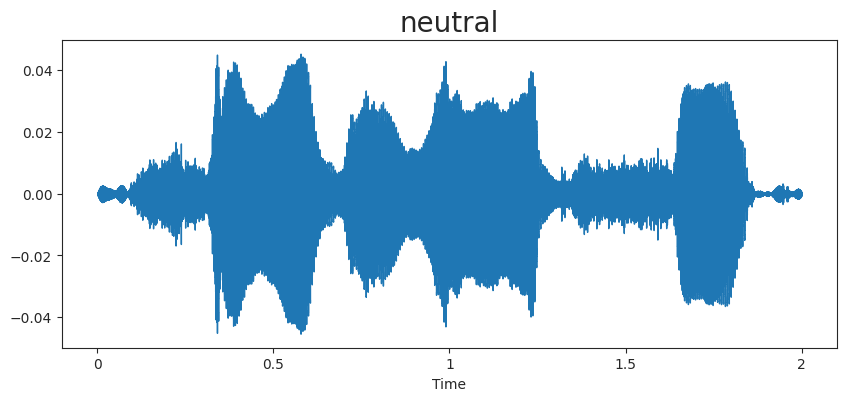

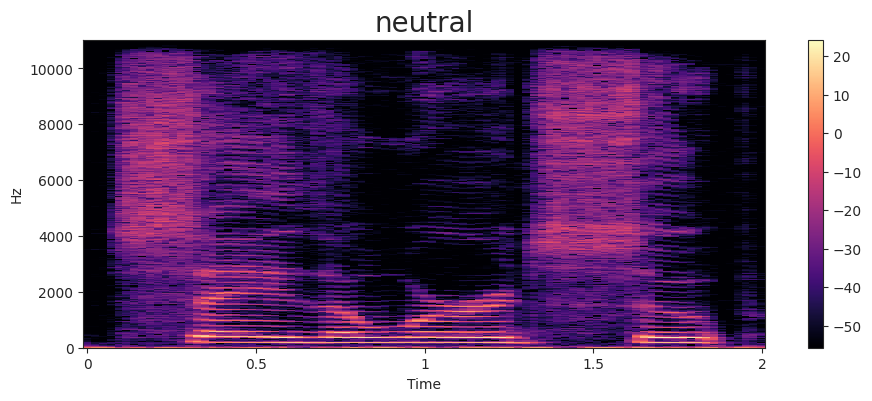

In [68]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

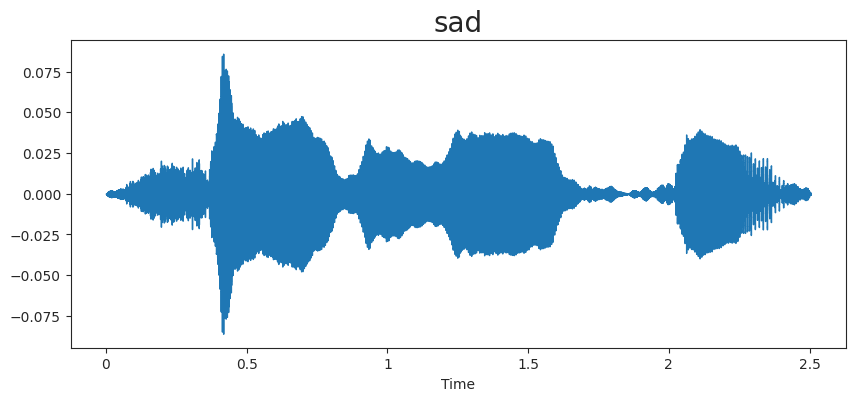

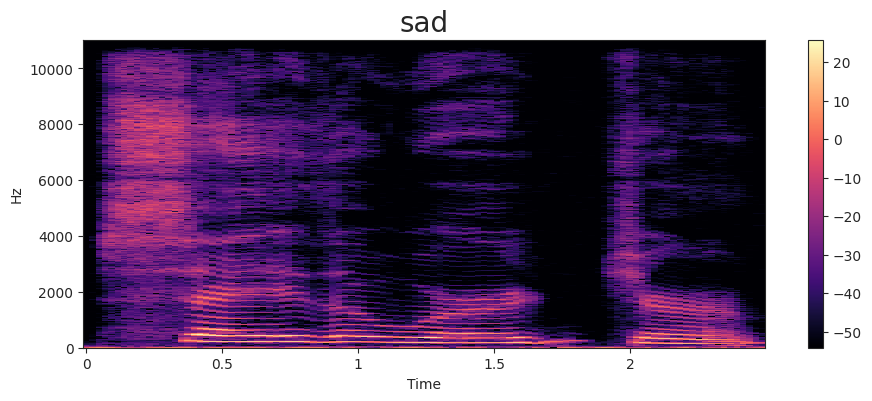

In [69]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

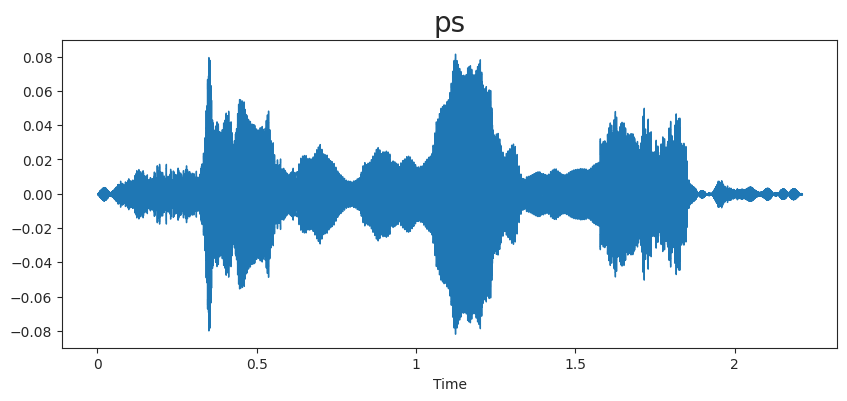

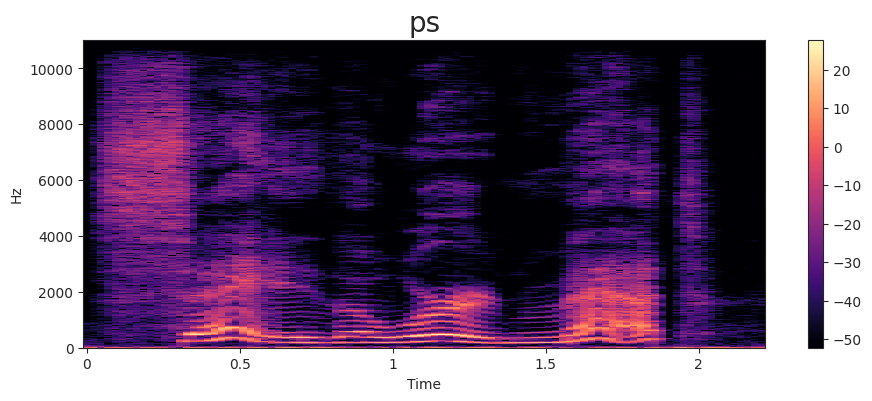

In [70]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

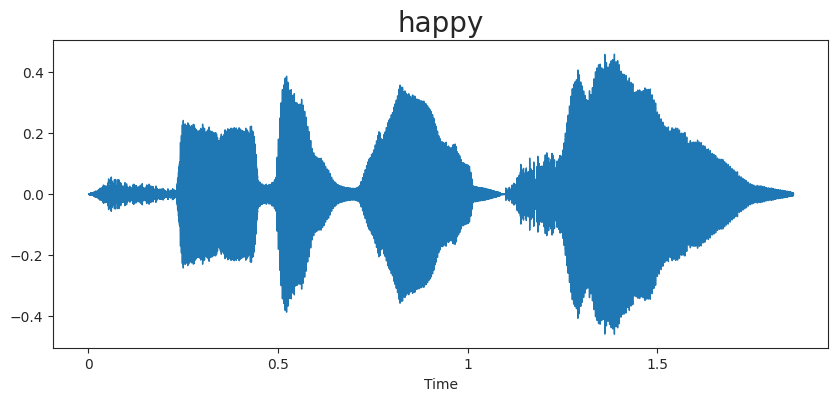

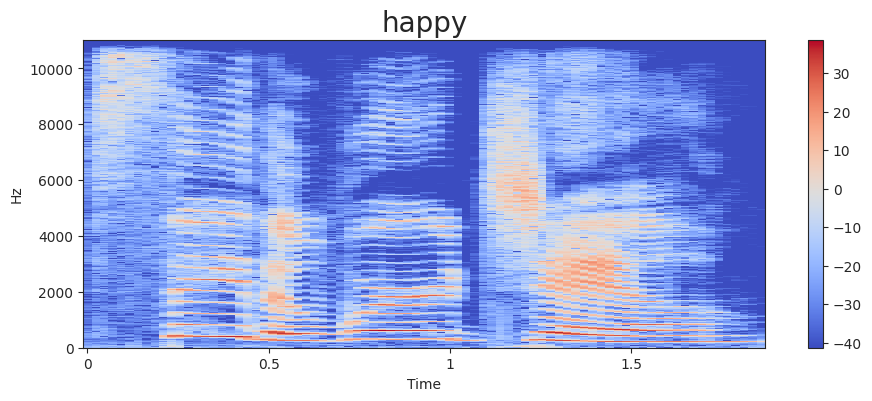

In [71]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [72]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename, duration=3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 40).T, axis =0)
    return mfcc

In [73]:
extract_mfcc(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [74]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [75]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 5600, dtype: object

In [76]:
X = [x for x in X_mfcc]
X =  np.array(X)
X.shape

(5600, 40)

In [77]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [78]:
from sklearn.preprocessing import OneHotEncoder
enc =  OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [79]:
y=y.toarray()

In [80]:
y.shape

(5600, 7)

## Created a LSTM Model

In [81]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences= False, input_shape= (40,1)),
    Dense(64, activation= 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
    
])

model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [82]:
history = model.fit(X, y, validation_split=0.2, epochs = 100, batch_size = 512, shuffle = True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.2314 - loss: 1.9142 - val_accuracy: 0.0732 - val_loss: 1.9596
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3995 - loss: 1.6495 - val_accuracy: 0.2170 - val_loss: 2.0577
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5921 - loss: 1.3007 - val_accuracy: 0.2313 - val_loss: 1.9221
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6594 - loss: 1.0438 - val_accuracy: 0.2205 - val_loss: 1.5415
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7017 - loss: 0.8407 - val_accuracy: 0.3420 - val_loss: 1.2598
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7680 - loss: 0.6548 - val_accuracy: 0.4446 - val_loss: 1.1223
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8120 - loss: 0.5117 - val_accuracy: 0.6687 - val_loss: 0.7954
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8603 - loss: 0.4035 - val_accuracy: 0.8116 - val_loss:

## Plotting the result

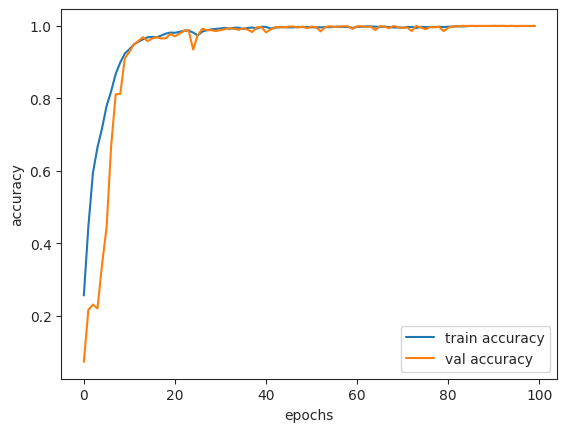

In [83]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

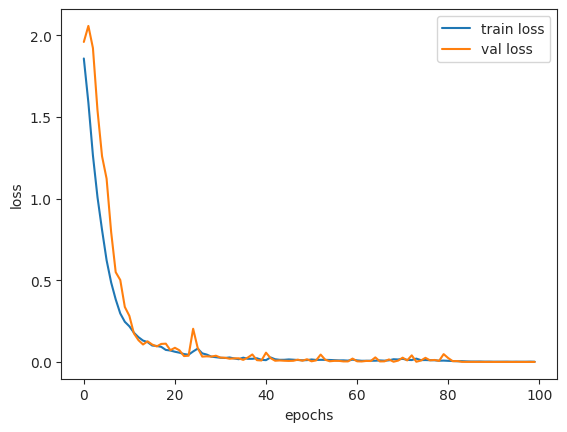

In [84]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [85]:
model.save('Speech_Emotion_Detection_Model_v1.0.h5')